<a href="https://colab.research.google.com/github/larsivarsk/deep-learning-ai-class/blob/main/Notes_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Midterm practice Deep Learning AI

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

In [46]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [47]:
np.ndim(train_images)

3

In [48]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [49]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [50]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [51]:
np.ndim(train_images)

2

In [52]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2633 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1071 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0700 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0512 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0387 - accuracy: 0.9886


In [53]:
test_digits = test_images[:10]
predictions = model.predict(test_digits)


1/1 [==============================] - 0s 81ms/step


In [54]:
import numpy as np
predictions[0]

pred = np.argmax(predictions[0])
test_labels[0]-pred


0

In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0660 - accuracy: 0.9794
test_acc: 0.9793999791145325


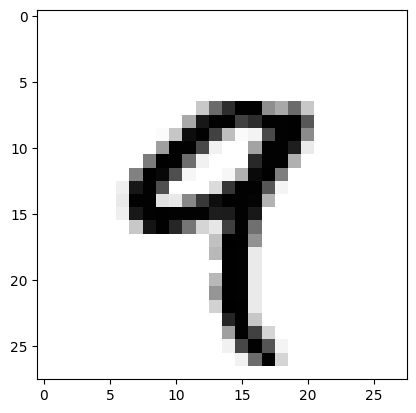

In [60]:
import matplotlib.pyplot as plt
plt.imshow(train_images.reshape(60000,28,28)[4], cmap=plt.cm.binary)
plt.show()

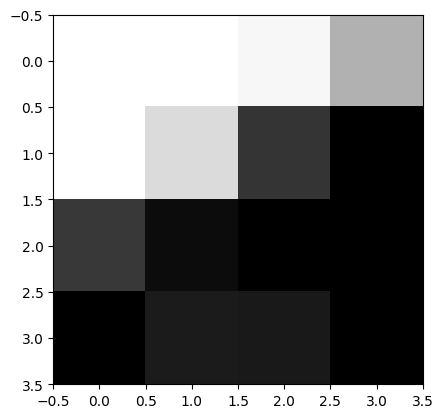

In [64]:
my_slice = train_images.reshape(60000,28,28)[4][12:-12, 12:-12]
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

#### Tensor Operations and mathematical operations. More in chapter 2 notebook as well with gradientTape!

In [65]:
x = np.array([[0., 1.],[1.,3.], [4., 5.]])

In [66]:
x.reshape(6,1)

array([[0.],
       [1.],
       [1.],
       [3.],
       [4.],
       [5.]])

In [67]:
x.reshape(3,2)

array([[0., 1.],
       [1., 3.],
       [4., 5.]])

In [68]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
  y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [69]:
x = tf.Variable(tf.random.uniform((3,3)))
with tf.GradientTape() as tape:
  y = 2* x + 3
grad_of_y_wrt_x = tape.gradient(y,x)

In [90]:
W = tf.Variable(tf.random.uniform((2,3)))
b = tf.Variable(tf.zeros((3,)))
x = tf. random.uniform((3,2))

with tf.GradientTape() as tape:
  y = tf.matmul(x,W) + b
grad_ow_y_wrt_W_and_b = tape.gradient(y, [W,b])

In [92]:
tf.matmul(x,W)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.28307748, 1.0297177 , 0.6332474 ],
       [0.44890004, 1.0758731 , 0.3755588 ],
       [0.3210384 , 1.1639239 , 0.7137879 ]], dtype=float32)>

#### NavieDense, mathematical building blocks and batch generator also in chapter 2 code.

In [97]:
x = tf.Variable(2.)
y = tf.Variable(1.)

with tf.GradientTape() as tape:
  f = x**2*y+x*y+3*y
f_wrt_x_y = tape.gradient(f,[x,y])
f_wrt_x_y

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>]

In [99]:
def func(x,y):
  return x**2*y + x*y + 3*y

In [121]:
from operator import matmul
x = tf.constant(np.array([1.,4.,3.]).reshape(1,3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3,2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)

with tf.GradientTape() as tape:
  f = W**2*b+W*b+3*b - (tf.matmul(x,W)+b)
f_wrt_W1 = tape.gradient(f, W)
f_wrt_W1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ -3.,  -3.],
       [-12., -12.],
       [ -9.,  -9.]], dtype=float32)>

In [122]:
with tf.GradientTape() as tape:
  f = W**2*b+W*b+3*b - (tf.matmul(x,W)+b)
f_wrt_b1= tape.gradient(f, b)
f_wrt_b1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([8.376373, 7.677638], dtype=float32)>

In [124]:
with tf.GradientTape() as tape:
  f = W**2*b+W*b+3*b - tf.pow((tf.matmul(x,W)+b),2)
f_wrt_W2 = tape.gradient(f, W)
f_wrt_W2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-16.008747, -10.975047],
       [-64.03499 , -43.90019 ],
       [-48.02624 , -32.92514 ]], dtype=float32)>

In [125]:
with tf.GradientTape() as tape:
  f = W**2*b+W*b+3*b - tf.pow((tf.matmul(x,W)+b),2)
f_wrt_b2 = tape.gradient(f, b)
f_wrt_b2

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-4.632374  , -0.29740918], dtype=float32)>

In [4]:
import tensorflow as tf
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))

In [10]:
v[0].assign(1)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.        ],
       [0.2342185 ],
       [0.26930338]], dtype=float32)>

In [15]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.       ],
       [1.2342185],
       [1.2693033]], dtype=float32)>

In [25]:
a = tf.Variable(tf.ones((2,2)))
a.assign_add(a)
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d

In [29]:
e *=d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2539.3708, 2539.3708],
       [2539.3708, 2539.3708]], dtype=float32)>

#### Chapter 3 practice

In [31]:
import numpy as np

num_samples = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples)

In [32]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [39]:
targets = np.vstack((np.zeros((num_samples, 1), dtype="float32"),
                     np.ones((num_samples, 1), dtype="float32")))

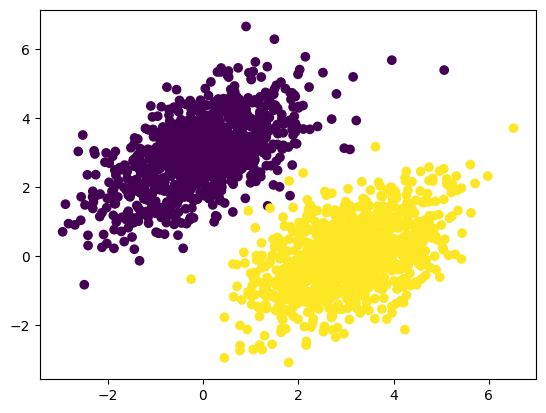

In [53]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1], c=targets[:,0])
plt.show()

In [57]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [58]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [59]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [67]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

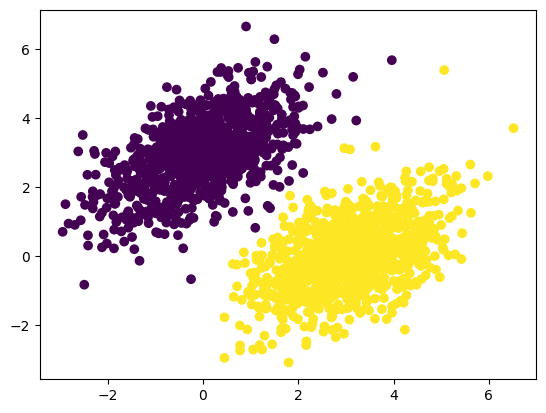

In [68]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

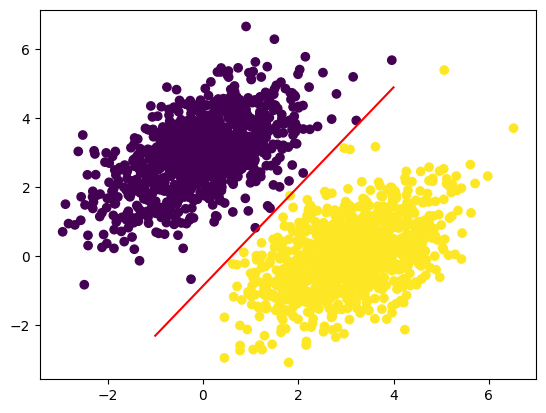

In [69]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

Loss at step 0: 0.0268
Loss at step 1: 0.0265
Loss at step 2: 0.0263
Loss at step 3: 0.0261
Loss at step 4: 0.0259
Loss at step 5: 0.0257
Loss at step 6: 0.0255
Loss at step 7: 0.0253
Loss at step 8: 0.0252
Loss at step 9: 0.0251
Loss at step 10: 0.0250
Loss at step 11: 0.0249
Loss at step 12: 0.0248
Loss at step 13: 0.0247
Loss at step 14: 0.0246
Loss at step 15: 0.0245
Loss at step 16: 0.0245
Loss at step 17: 0.0244
Loss at step 18: 0.0243
Loss at step 19: 0.0243
Loss at step 20: 0.0242
Loss at step 21: 0.0242
Loss at step 22: 0.0242
Loss at step 23: 0.0241
Loss at step 24: 0.0241
Loss at step 25: 0.0241
Loss at step 26: 0.0240
Loss at step 27: 0.0240
Loss at step 28: 0.0240
Loss at step 29: 0.0240
Loss at step 30: 0.0240
Loss at step 31: 0.0239
Loss at step 32: 0.0239
Loss at step 33: 0.0239
Loss at step 34: 0.0239
Loss at step 35: 0.0239
Loss at step 36: 0.0239
Loss at step 37: 0.0239
Loss at step 38: 0.0239
Loss at step 39: 0.0239


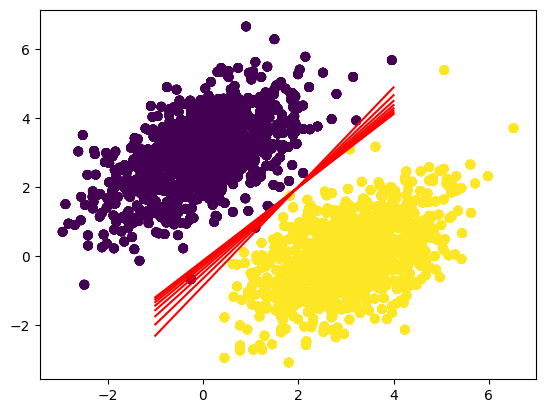

In [70]:
for step in range(40):

    if step%5 == 0:
      x = np.linspace(-1, 4, 100)
      y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
      plt.plot(x, y, "-r")
      plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

#### Choosing loss functions:
Binary crossentropy for a two-class classification

Categorical crossentropy for a many-class classification problem

Mean squared error for regression problem

#### Chapter 4

Plotting validation loss and validation accuracy

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuarcy])

In [73]:
#To one-hot encoding:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20
                    batch_size=512,
                    validation_data(x_val,y_val)
)

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Can also encode to sparse:

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

#Then we change the loss method
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#### Chapter 4/5

#### K-fold validation

In [87]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=100, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=100, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)



In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
truncated_mae_history = average_mae_history[50:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [88]:
#Final model after the above:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

#### Boston housing example

In [89]:
from tensorflow.keras.datasets import boston_housing

In [90]:
(x_train, y_train), (x_test, y_test) = (boston_housing.load_data())

In [91]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

Can prevent overfitting by reducing the network size

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #By choosing smaller numbers for ioutput size
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Adding regularizers or dropout:

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])